In [1]:
!pip install torchdata
!pip install -U torchtext==0.13.0
!pip install datasets
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Using cached torch-1.12.1-cp38-cp38-manylinux1_x86_64.whl (776.3 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0
    Uninstalling torch-1.12.0:
      Successfully uninstalled torch-1.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.0 requires torch==1.12.0, but you have torch 1.12.1 which is incompatible.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Using cached torch-1.12.0-cp38-cp38-manylinux1_x86_64.whl (776.3 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1
    Uninstalling torch-1.12.1:
      Successfully uninstalled torch-1.1

In [168]:
import torch
import torchtext
import datasets

import matplotlib.pyplot as plt
%matplotlib inline

In [201]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [202]:
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
print(stops)

{'be', 'few', 'wouldn', 'against', 'he', 'all', 'more', 'had', 'too', 'isn', 'yourselves', 'but', "don't", 'm', 'off', "doesn't", 'should', 'will', 'herself', "you've", 'a', "shan't", 'won', 'itself', 'an', "couldn't", "hadn't", "you'll", 'll', 'doesn', "you'd", 'mightn', 'only', 'below', 'having', "wouldn't", 'did', 'haven', "weren't", 'from', 'didn', 'each', 'themselves', 'yours', 'hadn', 'do', 'aren', 'don', 'am', 'is', 'to', 'weren', 'if', 'why', 'it', 'who', 'shouldn', 'these', 'and', 'down', 'by', 'then', 'd', 'at', 'ours', 'after', "that'll", 'such', 't', 'doing', 'this', 'y', "isn't", 's', 'hasn', 'both', 'not', 'nor', 'i', 'hers', 'theirs', "mightn't", 'most', 'once', 'been', 'with', 'me', 'during', 'ma', 'she', 'ain', "shouldn't", 'being', 'some', 'same', 'there', "mustn't", 'have', "didn't", 'until', 'about', 'we', 'needn', 'again', 'over', 'when', 'ourselves', 'of', 'those', 'has', 'the', 'myself', 'now', 'any', 'them', 'our', 'its', 'just', 'mustn', 'they', 'their', 'was',

In [270]:
# get dataset from hugging face library
train_data, test_data = datasets.load_dataset('imdb', split = ['train', 'test'])

Reusing dataset imdb (/home/ec2-user/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)


  0%|          | 0/2 [00:00<?, ?it/s]

In [271]:
train_data[:10]

{'text': ['I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far b

In [272]:
# reshuffle training and test datasets (randomize)
train_data = train_data.shuffle()
test_data = test_data.shuffle()

In [273]:
train_data[:10]

{'text': ['This is one of the worst movies I have seen this year. You should not see this movie but if you insist on wasting your time you should stop here, there are SPOILERS. Gray Matters centers on Gray and Sam Baldwin (Heather Graham and Tom Cavanagh). Only Gray and Sam are Brother and Sister; living together in everyone else\'s eyes as man and wife. No sex but just about everything else. Early on, the movie starts with its theme: \'the most absurd thing at the most absurd moment with you guessed it the most absurd reactions\'. Gray and Sam decided to check out the dog park with a borrowed pooch. Rather then push her brother to get the skinny on first woman they see for him, she does it and gets to the nitty-gritty questions too. When she signals her brother to come over they start a 3-way date. Charlie (Bridget Moynahan) is the girl of THEIR dreams, like all the right things etc\x85 Sam final hits Gray over the head and the couple finishes the date with a marriage proposal! That C

In [274]:
# function that just gets the last sentence
def get_last_sen(ex):
    text = ex['text']
    sen_list = nltk.tokenize.sent_tokenize(text)
    last_sentence = sen_list[-1]
    return {'last_sentence': last_sentence}

In [275]:
train_data = train_data.map(get_last_sen)
test_data = test_data.map(get_last_sen)

  0%|          | 0/25000 [00:00<?, ?ex/s]

  0%|          | 0/25000 [00:00<?, ?ex/s]

In [276]:
train_data, test_data

(Dataset({
     features: ['text', 'label', 'last_sentence'],
     num_rows: 25000
 }),
 Dataset({
     features: ['text', 'label', 'last_sentence'],
     num_rows: 25000
 }))

In [277]:
from torchtext.data.utils import get_tokenizer

# use a standard english tokenizer
tokenizer = get_tokenizer('basic_english')

In [278]:
# function that tokenizes the data and removes stopwords
def tokenize_data(ex):
    stop_words = set(stopwords.words('english'))
    tokens = tokenizer(ex['last_sentence'])
    tokens_without_stopwords = [token for token in tokens if token not in stop_words]
    return {'tokens': tokens_without_stopwords}

In [279]:
train_data = train_data.map(tokenize_data)
test_data = test_data.map(tokenize_data)

  0%|          | 0/25000 [00:00<?, ?ex/s]

  0%|          | 0/25000 [00:00<?, ?ex/s]

In [280]:
train_data, test_data

(Dataset({
     features: ['text', 'label', 'last_sentence', 'tokens'],
     num_rows: 25000
 }),
 Dataset({
     features: ['text', 'label', 'last_sentence', 'tokens'],
     num_rows: 25000
 }))

In [281]:
#Documentation: https://huggingface.co/docs/datasets/v2.4.0/en/package_reference/main_classes#datasets.Dataset.train_test_split
# split the training data into training and validation data
train_valid_data = train_data.train_test_split() # default test_size is 0.25
train_data = train_valid_data['train']
valid_data = train_valid_data['test']

In [282]:
train_data, valid_data, test_data

(Dataset({
     features: ['text', 'label', 'last_sentence', 'tokens'],
     num_rows: 18750
 }),
 Dataset({
     features: ['text', 'label', 'last_sentence', 'tokens'],
     num_rows: 6250
 }),
 Dataset({
     features: ['text', 'label', 'last_sentence', 'tokens'],
     num_rows: 25000
 }))

In [283]:
from torchtext.vocab import Vocab, build_vocab_from_iterator

UNK_IDX, PAD_IDX = 0, 1
special_symbols = ['<unk>', '<pad>']

# build vocab from the text tokens from training data
vocab = build_vocab_from_iterator(train_data['tokens'], min_freq = 100, specials = special_symbols)
#vocab = build_vocab_from_iterator(train_data['tokens'], max_tokens = 32, specials = special_symbols)

# set unknown index as the default
vocab.set_default_index(UNK_IDX)

In [284]:
len(vocab)

348

In [248]:
vocab.get_itos()[:30]

['<unk>',
 '<pad>',
 '.',
 ',',
 "'",
 'movie',
 'film',
 ')',
 '!',
 'one',
 '(',
 'like',
 'good',
 'see',
 'would',
 'watch',
 'time',
 'great',
 'really',
 'even',
 '-',
 'well',
 'bad',
 'better',
 'much',
 'get',
 'story',
 'movies',
 'think',
 'could']

In [285]:
def transform_tokens_bow(ex):
  bow = torch.zeros(len(vocab))
  c = 0 
  for token in ex['tokens']:
    bow[vocab[token]] += 1
    c += 1
  bow = {'bow': bow/c}
  return bow

In [286]:
train_data = train_data.map(transform_tokens_bow)
valid_data = valid_data.map(transform_tokens_bow)
test_data = test_data.map(transform_tokens_bow)

  0%|          | 0/18750 [00:00<?, ?ex/s]

  0%|          | 0/6250 [00:00<?, ?ex/s]

  0%|          | 0/25000 [00:00<?, ?ex/s]

In [287]:
train_data, valid_data, test_data

(Dataset({
     features: ['text', 'label', 'last_sentence', 'tokens', 'bow'],
     num_rows: 18750
 }),
 Dataset({
     features: ['text', 'label', 'last_sentence', 'tokens', 'bow'],
     num_rows: 6250
 }),
 Dataset({
     features: ['text', 'label', 'last_sentence', 'tokens', 'bow'],
     num_rows: 25000
 }))

In [288]:
# SIMPLE BOW CLASSIFIER

from torch import nn
import torch.nn.functional as F

class BoWClassifier(nn.Module):
# I referred to this tutorial for help: https://pytorch.org/tutorials/beginner/nlp/deep_learning_tutorial.html#sphx-glr-beginner-nlp-deep-learning-tutorial-py
    def __init__(self, num_labels, vocab_size):
        super(BoWClassifier, self).__init__()
        self.linear = nn.Linear(vocab_size, num_labels)
    def forward(self, bow_vec):
        # pass through linear layer and then softmax
        return F.log_softmax(self.linear(bow_vec), dim=1)

In [289]:
# collate function to put examples in batches 
def collate_batch(batch):
    batch_bows, batch_labels = [], []

    for b in batch: 
        batch_bows.append(torch.tensor(b['bow'])) # all bow vectors should be the same length (len of vocab)
        batch_labels.append(torch.tensor(b['label']))

    batch_bows = torch.stack(batch_bows)
    batch_labels = torch.stack(batch_labels)

    batch = {'bows': batch_bows,
           'labels': batch_labels}

    return batch

In [290]:
INPUT_DIM = len(vocab)
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = BoWClassifier(OUTPUT_DIM, INPUT_DIM)

criterion = nn.CrossEntropyLoss()

In [291]:
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

BoWClassifier(
  (linear): Linear(in_features=348, out_features=2, bias=True)
)

In [292]:
from torch.utils.data import DataLoader

BATCH_SIZE = 128

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

In [293]:
import torch.optim as optim

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-3)

In [294]:
def get_accuracy(predictions, actual_labels):
    batch_size = predictions.shape[0]
    #print('predictions')
    #print(predictions)
    predicted_labels = predictions.argmax(1)
    #print('predicted labels')
    #print(predicted_labels)
    #print('actual labels')
    #print(actual_labels)
    num_correct = (predicted_labels == actual_labels).sum()
    accuracy = num_correct / batch_size
    #print('num correct')
    #print(num_correct)
    #print('accuracy')
    #print(accuracy)
    return accuracy

In [295]:
def train(dataloader):
    model.train()

    epoch_loss, epoch_accuracy = 0, 0

    for idx, batch in enumerate(dataloader):
        token_bows = batch['bows']
        labels = batch['labels']
        optimizer.zero_grad()
        predictions = model(token_bows)
        loss = criterion(predictions, labels)
        accuracy = get_accuracy(predictions, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_accuracy += accuracy.item()

    return epoch_loss / len(dataloader), epoch_accuracy / len(dataloader)

In [296]:
def evaluate(dataloader):
    model.eval()

    epoch_loss, epoch_accuracy = 0, 0

    with torch.no_grad():
        for idx, batch in enumerate(dataloader):
            token_bows = batch['bows']
            labels = batch['labels']
            predictions = model(token_bows)
            loss = criterion(predictions, labels)
            accuracy = get_accuracy(predictions, labels)
            epoch_loss += loss.item()
            epoch_accuracy += accuracy.item()

    return epoch_loss / len(dataloader), epoch_accuracy / len(dataloader)

In [297]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

Epoch: 01 | Time: 0m 37s
train_loss: nan, train_acc: 0.497
valid_loss: nan, valid_acc: 0.511
test loss: nan, test_acc: 0.500
Epoch: 02 | Time: 0m 37s
train_loss: nan, train_acc: 0.497
valid_loss: nan, valid_acc: 0.511
test loss: nan, test_acc: 0.500
Epoch: 03 | Time: 0m 37s
train_loss: nan, train_acc: 0.497
valid_loss: nan, valid_acc: 0.511
test loss: nan, test_acc: 0.500
Epoch: 04 | Time: 0m 38s
train_loss: nan, train_acc: 0.497
valid_loss: nan, valid_acc: 0.511
test loss: nan, test_acc: 0.500
Epoch: 05 | Time: 0m 38s
train_loss: nan, train_acc: 0.497
valid_loss: nan, valid_acc: 0.511
test loss: nan, test_acc: 0.500
Epoch: 06 | Time: 0m 38s
train_loss: nan, train_acc: 0.497
valid_loss: nan, valid_acc: 0.511
test loss: nan, test_acc: 0.500
Epoch: 07 | Time: 0m 37s
train_loss: nan, train_acc: 0.497
valid_loss: nan, valid_acc: 0.511
test loss: nan, test_acc: 0.500
Epoch: 08 | Time: 0m 36s
train_loss: nan, train_acc: 0.497
valid_loss: nan, valid_acc: 0.511
test loss: nan, test_acc: 0.500


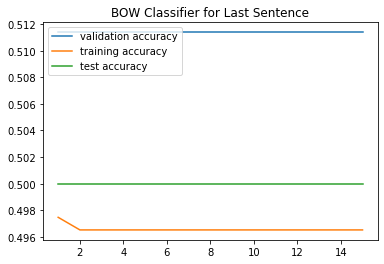

In [134]:
# BOW (with vocab min freq = 20 and batch size = 500 and lr=0.1)

N_EPOCHS = 15
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader)
    valid_loss, valid_acc = evaluate(valid_dataloader)
    test_loss, test_acc = evaluate(test_dataloader)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    print(f'test loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('BOW Classifier for Last Sentence')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 12s
train_loss: nan, train_acc: 0.502
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.500
Epoch: 02 | Time: 0m 12s
train_loss: nan, train_acc: 0.501
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.500
Epoch: 03 | Time: 0m 12s
train_loss: nan, train_acc: 0.501
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.500
Epoch: 04 | Time: 0m 12s
train_loss: nan, train_acc: 0.501
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.500
Epoch: 05 | Time: 0m 12s
train_loss: nan, train_acc: 0.501
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.500
Epoch: 06 | Time: 0m 12s
train_loss: nan, train_acc: 0.501
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.500
Epoch: 07 | Time: 0m 13s
train_loss: nan, train_acc: 0.501
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.500
Epoch: 08 | Time: 0m 13s
train_loss: nan, train_acc: 0.501
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.500


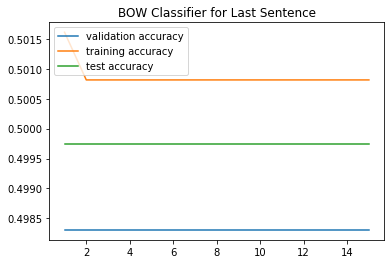

In [167]:
# BOW (with vocab min freq = 100 and batch size = 128 and lr=0.1)

N_EPOCHS = 15
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader)
    valid_loss, valid_acc = evaluate(valid_dataloader)
    test_loss, test_acc = evaluate(test_dataloader)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    print(f'test loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('BOW Classifier for Last Sentence')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 12s
train_loss: nan, train_acc: 0.505
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.500
Epoch: 02 | Time: 0m 13s
train_loss: nan, train_acc: 0.501
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.500
Epoch: 03 | Time: 0m 12s
train_loss: nan, train_acc: 0.501
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.500
Epoch: 04 | Time: 0m 13s
train_loss: nan, train_acc: 0.501
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.500
Epoch: 05 | Time: 0m 12s
train_loss: nan, train_acc: 0.501
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.500
Epoch: 06 | Time: 0m 12s
train_loss: nan, train_acc: 0.501
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.500
Epoch: 07 | Time: 0m 13s
train_loss: nan, train_acc: 0.501
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.500
Epoch: 08 | Time: 0m 12s
train_loss: nan, train_acc: 0.501
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.500


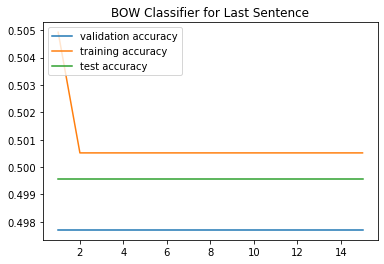

In [200]:
# BOW (with vocab min freq = 100 and batch size = 128 and lr=0.01)

N_EPOCHS = 15
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader)
    valid_loss, valid_acc = evaluate(valid_dataloader)
    test_loss, test_acc = evaluate(test_dataloader)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    print(f'test loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('BOW Classifier for Last Sentence')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 12s
train_loss: nan, train_acc: 0.503
valid_loss: nan, valid_acc: 0.491
test loss: nan, test_acc: 0.500
Epoch: 02 | Time: 0m 12s
train_loss: nan, train_acc: 0.503
valid_loss: nan, valid_acc: 0.491
test loss: nan, test_acc: 0.500
Epoch: 03 | Time: 0m 13s
train_loss: nan, train_acc: 0.503
valid_loss: nan, valid_acc: 0.491
test loss: nan, test_acc: 0.500
Epoch: 04 | Time: 0m 13s
train_loss: nan, train_acc: 0.503
valid_loss: nan, valid_acc: 0.491
test loss: nan, test_acc: 0.500
Epoch: 05 | Time: 0m 12s
train_loss: nan, train_acc: 0.503
valid_loss: nan, valid_acc: 0.491
test loss: nan, test_acc: 0.500
Epoch: 06 | Time: 0m 12s
train_loss: nan, train_acc: 0.503
valid_loss: nan, valid_acc: 0.491
test loss: nan, test_acc: 0.500
Epoch: 07 | Time: 0m 12s
train_loss: nan, train_acc: 0.503
valid_loss: nan, valid_acc: 0.491
test loss: nan, test_acc: 0.500
Epoch: 08 | Time: 0m 12s
train_loss: nan, train_acc: 0.503
valid_loss: nan, valid_acc: 0.491
test loss: nan, test_acc: 0.500


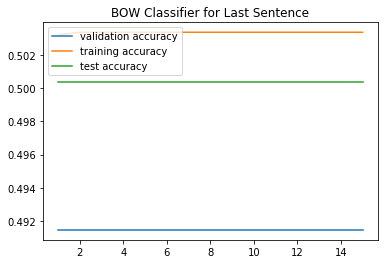

In [232]:
# BOW (with vocab min freq = 100 and batch size = 128 and lr=3)

N_EPOCHS = 15
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader)
    valid_loss, valid_acc = evaluate(valid_dataloader)
    test_loss, test_acc = evaluate(test_dataloader)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    print(f'test loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('BOW Classifier for Last Sentence')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 12s
train_loss: nan, train_acc: 0.495
valid_loss: nan, valid_acc: 0.512
test loss: nan, test_acc: 0.500
Epoch: 02 | Time: 0m 12s
train_loss: nan, train_acc: 0.496
valid_loss: nan, valid_acc: 0.512
test loss: nan, test_acc: 0.500
Epoch: 03 | Time: 0m 12s
train_loss: nan, train_acc: 0.496
valid_loss: nan, valid_acc: 0.512
test loss: nan, test_acc: 0.500
Epoch: 04 | Time: 0m 12s
train_loss: nan, train_acc: 0.496
valid_loss: nan, valid_acc: 0.512
test loss: nan, test_acc: 0.500
Epoch: 05 | Time: 0m 14s
train_loss: nan, train_acc: 0.496
valid_loss: nan, valid_acc: 0.512
test loss: nan, test_acc: 0.500
Epoch: 06 | Time: 0m 13s
train_loss: nan, train_acc: 0.496
valid_loss: nan, valid_acc: 0.512
test loss: nan, test_acc: 0.500
Epoch: 07 | Time: 0m 13s
train_loss: nan, train_acc: 0.496
valid_loss: nan, valid_acc: 0.512
test loss: nan, test_acc: 0.500
Epoch: 08 | Time: 0m 12s
train_loss: nan, train_acc: 0.496
valid_loss: nan, valid_acc: 0.512
test loss: nan, test_acc: 0.500


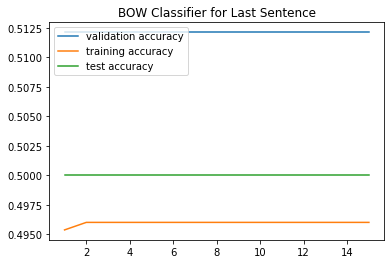

In [262]:
# BOW (with vocab min freq = 100 and batch size = 128 and lr=0.0000001)

N_EPOCHS = 15
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader)
    valid_loss, valid_acc = evaluate(valid_dataloader)
    test_loss, test_acc = evaluate(test_dataloader)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    print(f'test loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('BOW Classifier for Last Sentence')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

In [264]:
import random

a = 0
b = 18750
r = random.randint(a, b)

train_data[r]

{'text': 'After all these years, of Peter O\'Tool\'s brilliant, costly giving of his Soul, film after film, at last, Hollywood tosses him an Oscar recently.<br /><br />Country Dance showed up one night late, and of course, blew me out of my complainant niche in my alleged "Life". How does he do it?<br /><br />York again also is brilliant in this kind of play. Both psychological battleships loaded for bear....<br /><br />Bravo to author, director, cast, and camera crew. No wonder the Nazi\'s lost to these Irish, Scot, English blends....brutal honesty hurts...back in the 70\'s, when I personally believed "honesty" was pure and absolutely vital to trust. I have modified my edgy extremes, and will settle for more human, warm flaws within myself and others.<br /><br />Forgiveness allows humanity to have a reverse gear, and allows us to fix our own bull headed egos and erotic mistakes....',
 'label': 1,
 'last_sentence': 'I have modified my edgy extremes, and will settle for more human, warm

In [265]:
import random

a = 0
b = 18750
r = random.randint(a, b)

train_data[r]

{'text': 'The main complaint with this film is the fact that I CAN NOT tell who is who. No racism intended, but these Asians look all the same! I can tell somewhat of the story, but heck thats about as far as it goes. The peoples identities are not a mystery, if they were a mystery I would care about them. Instead I wasn\'t them off the screen ASAP.<br /><br />Tons of wide shots and silent emotionless faces occupy this movie. Heck is it boring, not only do I not know these people, but they are just sitting there.<br /><br />The production is typical Chinese John Woo, terrible video with blotched scenes. This looks only slightly better than Andy Lau\'s "Fulltime Killer" (Which was a great movie.) You would think with a decent budget they could at least make it look like 90s Hollywood. I didn\'t know the Chinese had these art-house beatniks.',
 'label': 0,
 'last_sentence': "I didn't know the Chinese had these art-house beatniks.",
 'tokens': ["'", 'know', 'chinese', 'art-house', 'beatni

In [266]:
import random

a = 0
b = 18750
r = random.randint(a, b)

train_data[r]

{'text': 'Most 70s (and 80s) Kong Kong martial arts films barely function as movies; usually there are a few well-planned fight sequences, but the plot is scraped pretty thin to fill in the gaps between those nodes -- like porno films, really.<br /><br />But this one does several things well. Most overtly, there is the direction and choreography, which confines each combatant to a \'style\' -- it\'s really based on Chinese circus acrobatics and comedic theater, but the effect works.<br /><br />Second, there is the language of the camera, which uses some impressive techniques(even by today\'s measure), changing projection speeds from real time time to slow motion, and from unfiltered to filtered views to depict story direction toward the past or toward the future.<br /><br />Least overt, but most powerful and unexpected, is the construction. The winner of this contest is determined by who \'unfolds\' the story. The master (the writer) sets up a game where the lead character doesn\'t kno

In [267]:
import random

a = 0
b = 18750
r = random.randint(a, b)

train_data[r]

{'text': "This had a good story...it had a nice pace and all characters are developed cool.<br /><br />I've watched a whole bunch of movies in the last two weeks and this had to be the best one I've seen in the two weeks.<br /><br />Jason Bigg's character was the best though.<br /><br />Even though it was small, it was cleverly crafted from the very beginning.<br /><br />This may be a romantic comedy and I don't like most, but the writing, direction, performing, sound, design overall in all capacity just was really thought out pretty cool.<br /><br />This film scored pretty high out of all the movie's I've seen lately - and the rest were big budget or better publicized.<br /><br />Good job in writing.",
 'label': 1,
 'last_sentence': "This had a good story...it had a nice pace and all characters are developed cool.<br /><br />I've watched a whole bunch of movies in the last two weeks and this had to be the best one I've seen in the two weeks.<br /><br />Jason Bigg's character was the b

In [268]:
import random

a = 0
b = 18750
r = random.randint(a, b)

train_data[r]

{'text': "What's inexplicable? Firstly, the hatred towards this movie. It may not be the greatest movie of all time, but gimme a break, it got 11 oscars for a reason, it made EIGHTEEN HUNDRED MILLION DOLLARS for a reason. It's a damn good movie. Which brings to the other inexplicable aspect of it. I have no idea whatsoever why this movie left such an impression on me when I saw it in theaters. I've rewatched it on TV and video, and it had none of the impact it had when I saw it on the big screen (twice, or maybe three times, actually). But that might be it, the appeal of it. It's a Movie, yes, capital M there, it's an Epic, it's a spectacle in the order of Gone With the Wind or Ben Hur. Now, Ben Hur and Gone With the Wind seem kinda hokey to me, with the hammy acting and excessive melodrama. Not that Titanic has none of that. Well, the acting was actually very good. The melodrama was quite heavy-handed at times.<br /><br />But the reason Titanic works is that it's such an emotional rid

In [269]:
import random

a = 0
b = 18750
r = random.randint(a, b)

train_data[r]

{'text': "Not one of your harder-hitting stories, and that's a real strength of this film. There are at least two relationships in which less confident writers would have added some all-too predictable romantic tension. They not only spare the audience this, but throw in some surprises at the same time. There are a few Disney-ish moments, particularly near the end, but they are manageable. Overall, it was worth the rental and it was good, relaxed fun.<br /><br />BTW, if you get the DVD, watch the segment where the director teaches you how to make aloo gobi. We followed her directions and it was BRILLIANT! Next time we will make it the day before we plan to eat it, because this is one dish that definitely gets better with a full night in the fridge to let the spices out!",
 'label': 1,
 'last_sentence': 'Next time we will make it the day before we plan to eat it, because this is one dish that definitely gets better with a full night in the fridge to let the spices out!',
 'tokens': ['ne

Epoch: 01 | Time: 0m 16s
train_loss: nan, train_acc: 0.501
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.499
Epoch: 02 | Time: 0m 18s
train_loss: nan, train_acc: 0.501
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.499
Epoch: 03 | Time: 0m 20s
train_loss: nan, train_acc: 0.501
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.499
Epoch: 04 | Time: 0m 17s
train_loss: nan, train_acc: 0.501
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.499
Epoch: 05 | Time: 0m 20s
train_loss: nan, train_acc: 0.501
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.499
Epoch: 06 | Time: 0m 18s
train_loss: nan, train_acc: 0.501
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.499
Epoch: 07 | Time: 0m 18s
train_loss: nan, train_acc: 0.501
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.499
Epoch: 08 | Time: 0m 18s
train_loss: nan, train_acc: 0.501
valid_loss: nan, valid_acc: 0.498
test loss: nan, test_acc: 0.499


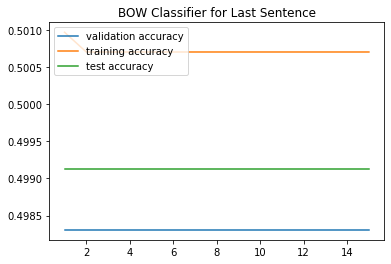

In [298]:
# BOW (with vocab min freq = 100 and batch size = 128 and lr=5e-3)

N_EPOCHS = 15
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
    start_time = time.time()

    train_loss, train_acc = train(train_dataloader)
    valid_loss, valid_acc = evaluate(valid_dataloader)
    test_loss, test_acc = evaluate(test_dataloader)

    end_time = time.time()

    valid_accuracies.append(valid_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut2-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
    print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
    print(f'test loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('BOW Classifier for Last Sentence')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")